In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
#import seaborn as sbs

DATA **collection

In [63]:
BBK_2016 = pd.read_csv('BKK-2016.csv')
BBK_2017 = pd.read_csv('BKK-2017.csv')
BBK_2018 = pd.read_csv('BKK-2018.csv')
BBK_2019 = pd.read_csv('BKK-2019.csv')
BBK_2020 = pd.read_csv('BKK-2020.csv')
BBK_2021 = pd.read_csv('BKK-2021.csv')
BBK_2022 = pd.read_csv('BKK-2022.csv')
BBK_2023 = pd.read_csv('BKK-2023.csv')


In [64]:
merged_df = pd.concat([BBK_2016, BBK_2017, BBK_2018, BBK_2019, BBK_2020, BBK_2021, BBK_2022, BBK_2023], ignore_index=True)
print(merged_df)

           date   pm25
0     30/7/2016     61
1     31/7/2016     68
2      1/8/2016     60
3      2/8/2016     68
4      3/8/2016     70
...         ...    ...
2554   6/8/2023     57
2555   7/8/2023     57
2556   8/8/2023     56
2557   9/8/2023     63
2558  10/8/2023     68

[2559 rows x 2 columns]


In [65]:
merged_df

,date,pm25
0,30/7/2016,61
1,31/7/2016,68
2,1/8/2016,60
3,2/8/2016,68
4,3/8/2016,70
...,...,...
2554,6/8/2023,57
2555,7/8/2023,57
2556,8/8/2023,56
2557,9/8/2023,63


In [66]:
merged_df.to_csv("BKK_PM_All.csv", index=False)

Data cleaning and Data Preprocessing 

In [67]:
df_train = pd.read_csv('BKK_PM_All.csv')
df_train 

,date,pm25
0,30/7/2016,61
1,31/7/2016,68
2,1/8/2016,60
3,2/8/2016,68
4,3/8/2016,70
...,...,...
2554,6/8/2023,57
2555,7/8/2023,57
2556,8/8/2023,56
2557,9/8/2023,63


In [68]:
#Check missing value
print('Number of missing valuen : ',df_train[' pm25'].isnull().sum())
# Drop last Date is null 
df_train.dropna(subset=['date'], inplace=True)   
df_train

Number of missing valuen :  0


,date,pm25
0,30/7/2016,61
1,31/7/2016,68
2,1/8/2016,60
3,2/8/2016,68
4,3/8/2016,70
...,...,...
2554,6/8/2023,57
2555,7/8/2023,57
2556,8/8/2023,56
2557,9/8/2023,63


In [55]:
#df_train = df_train[~df_train.apply(lambda row: any(val.strip() == '' for val in row), axis=1)]
#df_train

,date,pm25
0,1/8/2023,59
1,2/8/2023,67
2,3/8/2023,72
3,4/8/2023,69
4,5/8/2023,64
...,...,...
2554,26/9/2016,52
2555,27/9/2016,46
2556,28/9/2016,54
2557,29/9/2016,51


In [69]:
df_train[' pm25']=df_train[' pm25'].shift(-15).rolling(30,min_periods=1).mean()
df_train

,date,pm25
0,30/7/2016,68.000000
1,31/7/2016,68.000000
2,1/8/2016,68.000000
3,2/8/2016,69.750000
4,3/8/2016,72.800000
...,...,...
2554,6/8/2023,59.578947
2555,7/8/2023,60.055556
2556,8/8/2023,60.294118
2557,9/8/2023,60.625000


df_train2 =df_train.copy()

In [86]:
df_train2

,date,pm25
0,1/8/2023,63.000000
1,2/8/2023,60.000000
2,3/8/2023,57.666667
3,4/8/2023,59.500000
4,5/8/2023,58.000000
...,...,...
2554,26/9/2016,66.052632
2555,27/9/2016,66.222222
2556,28/9/2016,66.176471
2557,29/9/2016,66.625000


<Axes: >

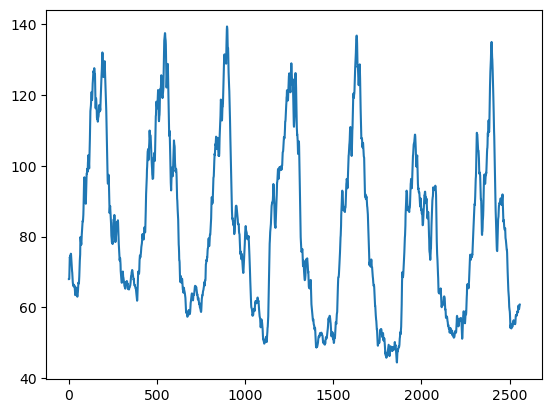

In [70]:
fig, ax = plt.subplots()

df_train[' pm25'].rolling(1).mean().plot()

In [71]:
def create_fea(df):
    df['PM2.5_ma20'] = df_train[' pm25'].shift(-7).rolling(14,min_periods=1).mean()
    date_time = pd.to_datetime(df['date'],format='%d/%m/%Y')
    
    df['day']=date_time.dt.strftime("%d").astype('int')
    df['month']=date_time.dt.strftime("%m").astype('int')
    df['year']=date_time.dt.strftime("%Y").astype('int')
    
    df['y_day']=getattr(date_time.dt, 'dayofyear')
    df['y_quarter']=getattr(date_time.dt, 'quarter')
    #df['y_week']=getattr(date_time.dt, 'weekofyear')
    
    lags = [7,30,365]
    lag_cols = [f"lag_{lag}" for lag in lags]
    for lag, lag_col in (zip(lags, lag_cols)):
        df[lag_col] = df[" pm25"].shift(lag)
        
    wins = [5,30]
    for win in (wins) :
        for lag,lag_col in (zip(lags, lag_cols)):
            df[f"Rmean_{lag}_{win}"] = df[lag_col].transform(lambda x : x.rolling(win).mean())
    
    for win in (wins) :
        for lag,lag_col in (zip(lags, lag_cols)):
            df[f"Rstd_{lag}_{win}"] = df[lag_col].transform(lambda x : x.rolling(win).std())

In [72]:
create_fea(df_train)
df_train

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_365_5,Rmean_7_30,Rmean_30_30,Rmean_365_30,Rstd_7_5,Rstd_30_5,Rstd_365_5,Rstd_7_30,Rstd_30_30,Rstd_365_30
0,30/7/2016,68.000000,74.625000,30,7,2016,212,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/7/2016,68.000000,74.479167,31,7,2016,213,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/8/2016,68.000000,74.419444,1,8,2016,214,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/8/2016,69.750000,74.473674,2,8,2016,215,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/8/2016,72.800000,74.612273,3,8,2016,216,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,6/8/2023,59.578947,60.009632,6,8,2023,218,3,58.807692,56.066667,...,51.926667,56.786423,56.531111,52.762222,0.127115,0.409607,0.458500,1.356359,2.699169,0.765328
2555,7/8/2023,60.055556,60.146595,7,8,2023,219,3,58.640000,55.433333,...,52.213333,56.886645,56.257778,52.764444,0.149996,0.356215,0.582428,1.379110,2.347428,0.765838
2556,8/8/2023,60.294118,60.199920,8,8,2023,220,3,59.666667,55.333333,...,52.493333,57.035534,56.008889,52.758889,0.397741,0.465713,0.549444,1.430879,1.999980,0.763421
2557,9/8/2023,60.625000,60.181432,9,8,2023,221,3,60.347826,55.433333,...,52.826667,57.203795,55.810000,52.760000,0.703474,0.473169,0.443095,1.514128,1.722850,0.764309


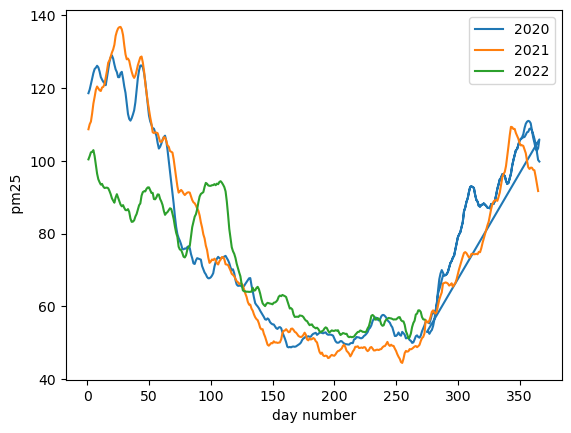

In [82]:
fig, ax = plt.subplots()
#ax.plot(df_train.loc[df_train['year']==2016]['y_day'],df_train.loc[df_train['year']==2016][' pm25'].rolling(1).mean())
#ax.plot(df_train.loc[df_train['year']==2018]['y_day'],df_train.loc[df_train['year']==2018][' pm25'].rolling(1).mean())
#ax.plot(df_train.loc[df_train['year']==2019]['y_day'],df_train.loc[df_train['year']==2019][' pm25'].rolling(1).mean())
ax.plot(df_train.loc[df_train['year']==2020]['y_day'],df_train.loc[df_train['year']==2020][' pm25'].rolling(1).mean())
ax.plot(df_train.loc[df_train['year']==2021]['y_day'],df_train.loc[df_train['year']==2021][' pm25'].rolling(1).mean())
ax.plot(df_train.loc[df_train['year']==2022]['y_day'],df_train.loc[df_train['year']==2022][' pm25'].rolling(1).mean())


ax.set_xlabel('day number')
ax.set_ylabel(' pm25')
plt.legend(['2020', '2021', '2022'])

In [75]:
df_train.dropna(inplace = True)
df_train.reset_index(drop=True,inplace=True)
df_train.shape

(2165, 23)

In [76]:
df_train

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_365_5,Rmean_7_30,Rmean_30_30,Rmean_365_30,Rstd_7_5,Rstd_30_5,Rstd_365_5,Rstd_7_30,Rstd_30_30,Rstd_365_30
0,29/8/2017,70.133333,68.750000,29,8,2017,241,3,61.900000,68.800000,...,66.257767,66.631111,67.482222,70.457025,0.759386,0.634910,0.188225,2.462748,2.019441,3.372741
1,30/8/2017,70.200000,69.595238,30,8,2017,242,3,62.200000,68.466667,...,66.270075,66.356667,67.578889,70.393692,0.584808,0.634910,0.171575,2.483095,1.993831,3.437684
2,31/8/2017,69.600000,70.373810,31,8,2017,243,3,63.766667,68.333333,...,66.126371,66.130000,67.684444,70.320359,0.733485,0.580038,0.208413,2.394316,1.944946,3.513144
3,1/9/2017,69.666667,71.009524,1,9,2017,244,3,65.433333,67.833333,...,66.074943,65.963333,67.764444,70.257025,1.472338,0.534582,0.164286,2.254367,1.897951,3.573033
4,2/9/2017,69.533333,71.497619,2,9,2017,245,3,67.266667,68.000000,...,65.953333,65.872222,67.851111,70.119803,2.256423,0.382681,0.224351,2.137820,1.844880,3.670887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,6/8/2023,59.578947,60.009632,6,8,2023,218,3,58.807692,56.066667,...,51.926667,56.786423,56.531111,52.762222,0.127115,0.409607,0.458500,1.356359,2.699169,0.765328
2161,7/8/2023,60.055556,60.146595,7,8,2023,219,3,58.640000,55.433333,...,52.213333,56.886645,56.257778,52.764444,0.149996,0.356215,0.582428,1.379110,2.347428,0.765838
2162,8/8/2023,60.294118,60.199920,8,8,2023,220,3,59.666667,55.333333,...,52.493333,57.035534,56.008889,52.758889,0.397741,0.465713,0.549444,1.430879,1.999980,0.763421
2163,9/8/2023,60.625000,60.181432,9,8,2023,221,3,60.347826,55.433333,...,52.826667,57.203795,55.810000,52.760000,0.703474,0.473169,0.443095,1.514128,1.722850,0.764309


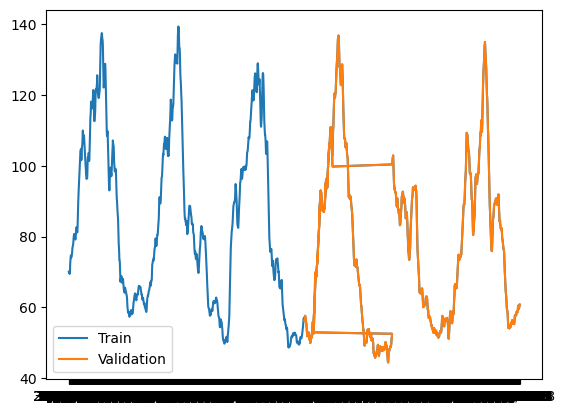

In [81]:
ratio = 0.5
split = int(len(df_train) * ratio)

#Step Lable 
dates_train,X_train, y_train =  df_train.iloc[:,0], df_train.iloc[:,2:], df_train.iloc[:,1]
dates_test,X_test, y_test =  df_train.iloc[split:,0], df_train.iloc[split:,2:], df_train.iloc[split:,1]
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation'])

In [83]:
# N = X_train.shape[1]
N = 100

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping,ModelCheckpoint


import tensorflow as tf

model = Sequential([
                    # Add the Input layer
                    layers.Input((X_train.shape[1], 1)),
                    # Add the first LSTM layer
                    layers.LSTM(N,return_sequences=True),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
                    
                    # Add a second LSTM layer
                    layers.LSTM(N,return_sequences=True),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
                    
                    # Add a third LSTM layer
                    layers.LSTM(N,return_sequences=True),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),

                    layers.LSTM(N,return_sequences=True),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
    
                     # Add a forth LSTM layer
                    layers.LSTM(N,return_sequences=False),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
    
                    # Add a dense layer
                    layers.Dense(64, activation='sigmoid'),
                    layers.Dropout(0.2),

                    layers.Dense(32, activation='sigmoid'),
                    layers.Dropout(0.2),    
                   
                    # Add the output layer
                    layers.Dense(1)])


model.summary()
    

2023-08-14 18:43:15.733672: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-08-14 18:43:15.733695: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-14 18:43:15.733713: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-14 18:43:15.733838: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-14 18:43:15.734219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 21, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 21, 100)           0         
                                                                 
 batch_normalization (Batch  (None, 21, 100)           400       
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 21, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 21, 100)           0         
                                                                 
 batch_normalization_1 (Bat  (None, 21, 100)           400       
 chNormalization)                                       

In [84]:
def lr_schedule(epoch, lr):
    if epoch < 100:
        return lr 
    else: 
        return lr 
#         return lr * tf.math.exp(-0.1)


# Compile the model
initial_learning_rate = 1e-3
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='mse',metrics=['mean_absolute_error'])

# Define the learning rate scheduler callback
lr_schedule = LearningRateScheduler(lr_schedule)


early_stopping = EarlyStopping(monitor='val_loss',mode='min',patience=100)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=0, save_best_only=True)

In [85]:
# Train the model with the learning rate scheduler callback
history = model.fit(X_train, y_train, epochs=200, batch_size=32 callbacks=[mc, lr_schedule,early_stopping],validation_data=(X_test, y_test))  #,validation_data=(X_test, y_test)

Epoch 1/200


2023-08-14 20:45:03.337476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-14 20:45:03.715892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-14 20:45:04.500212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-14 20:45:04.635366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-14 20:45:04.696772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-14 20:45:05.716428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-14 20:45:06.343395: I tensorflow/core/grappler/optimizers/cust

 2/68 [..............................] - ETA: 4s - loss: 7419.6460 - mean_absolute_error: 83.2148  

2023-08-14 20:45:06.553652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - ETA: 0s - loss: 6367.1128 - mean_absolute_error: 76.9971

2023-08-14 20:45:09.436535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-14 20:45:09.539860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-14 20:45:09.582637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-14 20:45:09.621078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-14 20:45:09.665826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 9s 52ms/step - loss: 6367.1128 - mean_absolute_error: 76.9971 - val_loss: 3050.0771 - val_mean_absolute_error: 51.0080 - lr: 0.0010
Epoch 2/200
 3/68 [>.............................] - ETA: 1s - loss: 6783.6577 - mean_absolute_error: 76.5861

/Users/kuer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


68/68 [==============================] - 2s 30ms/step - loss: 9371.4160 - mean_absolute_error: 83.6091 - val_loss: 5169.2622 - val_mean_absolute_error: 68.6756 - lr: 0.0010
Epoch 3/200
68/68 [==============================] - 2s 32ms/step - loss: 28891.0371 - mean_absolute_error: 126.7026 - val_loss: 2369.9067 - val_mean_absolute_error: 39.5168 - lr: 0.0010
Epoch 4/200
68/68 [==============================] - 2s 30ms/step - loss: 35074.9492 - mean_absolute_error: 140.1374 - val_loss: 1966.9788 - val_mean_absolute_error: 40.4983 - lr: 0.0010
Epoch 5/200
68/68 [==============================] - 2s 31ms/step - loss: 14854.1777 - mean_absolute_error: 87.7568 - val_loss: 7466.3628 - val_mean_absolute_error: 77.9740 - lr: 0.0010
Epoch 6/200
68/68 [==============================] - 2s 30ms/step - loss: 2878.3462 - mean_absolute_error: 41.7389 - val_loss: 1235.2080 - val_mean_absolute_error: 27.8222 - lr: 0.0010
Epoch 7/200
68/68 [==============================] - 2s 31ms/step - loss: 1432.698

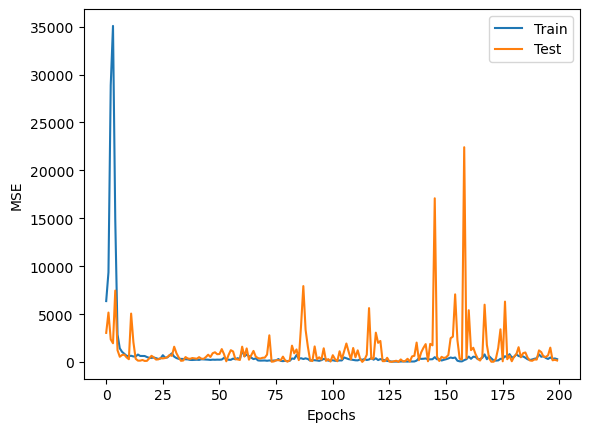

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Train','Test']);

In [88]:
import pandas as pd

# Generate a date range from August 11, 2023, to December 31, 2024
start_date = '2023-08-11'
end_date = '2024-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame with the date range
date_df = pd.DataFrame({'Date': date_range})

# Display the DataFrame
print(date_df)


          Date
0   2023-08-11
1   2023-08-12
2   2023-08-13
3   2023-08-14
4   2023-08-15
..         ...
504 2024-12-27
505 2024-12-28
506 2024-12-29
507 2024-12-30
508 2024-12-31

[509 rows x 1 columns]


In [100]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [98]:
#targets = dates_test[target_col][window_len:]
from sklearn.metrics import mean_absolute_error
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

34/34 [==============================] - 0s 8ms/step


11.690237653767188

In [101]:
mae = np.sqrt(mean_squared_error(preds, y_test))
print("Root Mean Squared Error (RMSE):", mae)

Root Mean Squared Error (RMSE): 12.99406181299431


In [90]:
date_df.to_csv("data_2024.csv", index=False)

In [ ]:
model.load_weights('/kaggle/working/best_model.h5')

2023-08-15 20:22:31.442267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:22:31.662741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:22:32.003158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:22:32.133899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:22:32.182253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 3s 9ms/step


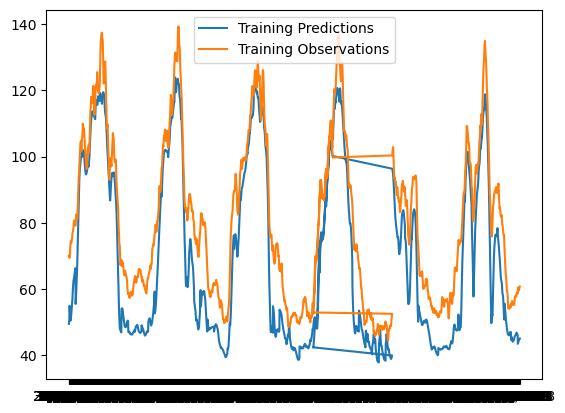

In [91]:
train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

34/34 [==============================] - 1s 10ms/step


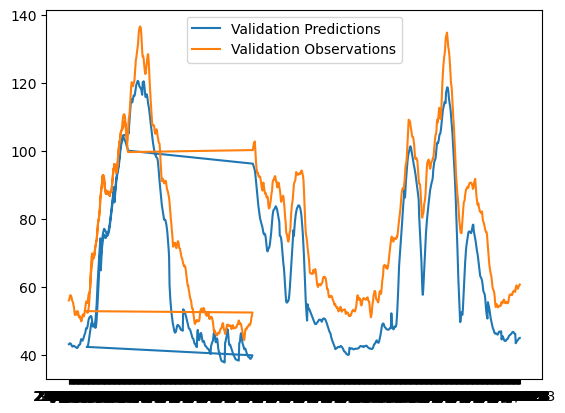

In [92]:
dates_test,X_test, y_test =  df_train.iloc[split:,0], df_train.iloc[split:,2:], df_train.iloc[split:,1]

test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [104]:
df_date = pd.read_csv("data_2024.csv")
df_date

,Date
0,2023-08-11
1,2023-08-12
2,2023-08-13
3,2023-08-14
4,2023-08-15
...,...
504,2024-12-27
505,2024-12-28
506,2024-12-29
507,2024-12-30


In [108]:
df_date.loc[:, 'PM2.5'] = ""
df_date

,Date,PM2.5
0,2023-08-11,
1,2023-08-12,
2,2023-08-13,
3,2023-08-14,
4,2023-08-15,
...,...,...
504,2024-12-27,
505,2024-12-28,
506,2024-12-29,
507,2024-12-30,


In [109]:
df_all = df_train2.copy()
df_all = pd.concat([df_all,df_date])
df_all.reset_index(drop=True,inplace=True)
df_all


,date,pm25,Date,PM2.5
0,1/8/2023,63.000000,NaN,NaN
1,2/8/2023,60.000000,NaN,NaN
2,3/8/2023,57.666667,NaN,NaN
3,4/8/2023,59.500000,NaN,NaN
4,5/8/2023,58.000000,NaN,NaN
...,...,...,...,...
3063,NaN,NaN,2024-12-27,
3064,NaN,NaN,2024-12-28,
3065,NaN,NaN,2024-12-29,
3066,NaN,NaN,2024-12-30,


In [111]:
create_fea(df_all)
df_all

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/kuer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_39426/2176089767.py", line 1, in <module>
    create_fea(df_all)
  File "/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_39426/2329185143.py", line 5, in create_fea
    df['day']=date_time.dt.strftime("%d").astype('int')
  File "/Users/kuer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pandas/core/generic.py", line 6324, in astype
    >>> s.values is shallow.values and s.index is shallow.index
  File "/Users/kuer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pandas/core/internals/managers.py", line 451, in astype
    self: T,
  File "/Users/kuer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = ge